# Capítulo 7. Aprendizaje en Conjunto y Random Forest

## <span style="color:green">1.Clasificador de Votaciones </span>

In [2]:
#Importa las librerías, por favor y gracias <3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
#Importa los clasificadores
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
#Este no lo conocían, se los presento
#Este VotingClassifier va a recibir los modelos y va a contar los votos de los resultados (como el INE para los mexas)


In [16]:
#Trae el set de datos
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
#Es sencillo pero, es trabajo honesto
df = pd.DataFrame(candidates, columns=['gmat', 'gpa', 'work_experience', 'admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [18]:
#Dividir el dataframe en dos: los datos a predecir y los datos predichos
X = df.drop('admitted', axis=1)
y = df['admitted']

In [22]:
#Importa el train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
#Divide los datos

In [52]:
#Entrena los modelos
#Genera los objetos
svc = SVC()
#Establece una profundidad máxima de 2 en el árbol de decisión
tree = DecisionTreeClassifier(max_depth=2)


In [54]:
#Genera un objeto para el votingClassifier
votos = VotingClassifier(estimators=[("SVM", svc), ("Tree", tree)], voting='hard')

En caso de querer una votación suave, poner en voting="Soft" (más adelante se ejemplifica)

In [57]:
#Calcular la exactitud de los modelos con accuracy_score
from sklearn.metrics import accuracy_score
#Ciclar a tráves de los 3 modelos que estamos desarrolando 
for i in (svc, tree, votos):
    #Ajustar
    i.fit(X_train, y_train)
    #Predecir los datos del x_test 
    y_pred = i.predict(X_test)
    #Arrojar el puntaje de exactitud 
    print(i.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.6666666666666666
DecisionTreeClassifier 0.8333333333333334
VotingClassifier 0.9166666666666666


In [59]:
#En caso de querer un margen suave se tiene que hacer ciertas modificaciones
svc = SVC(probability=True)
tree = DecisionTreeClassifier(max_depth=2)
votos = VotingClassifier(estimators=[("SVM", svc), ("Tree", tree)], voting='soft')
#Calcular la exactitud de los modelos con accuracy_score

#Ciclar a tráves de los 3 modelos que estamos desarrolando 
for i in (svc, tree, votos):
    #Ajustar
    i.fit(X_train, y_train)
    #Predecir los datos del x_test
    y_pred = i.predict(X_test)
    #Arrojar el puntaje de exactitud 
    print(i.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.6666666666666666
DecisionTreeClassifier 0.8333333333333334
VotingClassifier 0.8333333333333334


***

## <span style="color:green">2. Bagging y Pasting </span>

In [61]:
# Importar el clasificador BaggingClassifier
from sklearn.ensemble import BaggingClassifier
#Genera el objeto a raíz de un árbol de decisión (puede ser el que quieran)
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=10, bootstrap=True)
                           #cantidad de (en este caso) árboles de decisión

                            #La cantidad de datos que tomará de una muestra
                
                           #Bagging=True; Pasting=False
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
#Aunque dará un puntaje similar al clasificador de votaciones, esto se debe al set de datos pequeño.
accuracy_score(y_test, y_pred)

0.9166666666666666

In [63]:
#Hacer el ejemplo con pasting pero utilizar ahora SVC
pasting = BaggingClassifier(SVC(), n_estimators=50, max_samples=15, bootstrap=False)
pasting.fit(X_train, y_train)
y_pred = pasting.predict(X_test)
accuracy_score(y_test, y_pred)

0.3333333333333333

Pasting no suele ser utilizado en ejemplos reales. El puntaje de exactitud evidencia que es un pésimo modelo ❌ 

***

### <span style="color:blue">2.1 Evaluación Out-of-Bag  </span>

In [69]:
#Importar BaggingClassifier

#Poner oob_score=True para poder hacer la evaluación
OOB = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=10,
    bootstrap=True,
    oob_score=True
)

#Ajustar
OOB.fit(X_train, y_train)
#Visualiza el puntaje OOB
OOB.oob_score_

0.8928571428571429

Este puntaje es un parámetro extra, puedes concluir si hay o no un ajuste con base a los parámetros que ya sacaste y el puntaje OOB 💯.

***

## <span style="color:green">3. Random Subspace </span>

In [71]:
#Hacer un Bagging como los anteriores
random_subspace = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=10,
    bootstrap=True,
    #Max_features le dice que solo tomará 2 variables
    max_features=2
)
#Ajustar
random_subspace.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=2,
                  max_samples=10, n_estimators=100)

In [73]:
#Visualizar el puntaje de exactitud
y_pred = random_subspace.predict(X_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

## <span style="color:green">4. Random Forest </span>

In [75]:
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Hacer RandomForestClassifier, establecer los parámetros similares al bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=4,
)            

In [77]:
#Hacer el ajuste
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=4)

In [79]:
#Hacer las predicciones
y_pred = rf.predict(X_test)

In [81]:
#Visualiza el puntaje 
accuracy_score(y_test, y_pred)

0.9166666666666666

En el futuro, no les pedirán bagging, se prefiere utilizar Random Forest🌳

### <span style="color:blue">4.1 Predictores </span>

In [99]:
#Realiza el árbol de manera aleatoria

#Despliega los parámetros importantes o predictores
for nombre, score in zip(rf.feature_names_in_, rf.feature_importances_):
    print(f"Nombre: '{nombre}'\tPuntaje: {score}\n")

Nombre: 'gmat'	Puntaje: 0.3093601637808622

Nombre: 'gpa'	Puntaje: 0.37903567341592337

Nombre: 'work_experience'	Puntaje: 0.3116041628032144



El valor que arroja en cada variable es equivalente al nivel de importancia de la misma. En este caso el **gpa** es la variable que tiene mayor peso en la decisión

## <span style="color:green">5. Boosting </span>

### <span style="color:blue">5.1 Adaboost </span>

In [105]:
#Importar AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#Crear objeto de Adaboost con árboles de decisiones  
ada = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    learning_rate=0.1,
    algorithm='SAMME'
)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=100)

In [107]:
#Calcular el puntaje de exactitud para adaboost
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

### <span style="color:blue">5.2 Boosting con Gradiente </span>

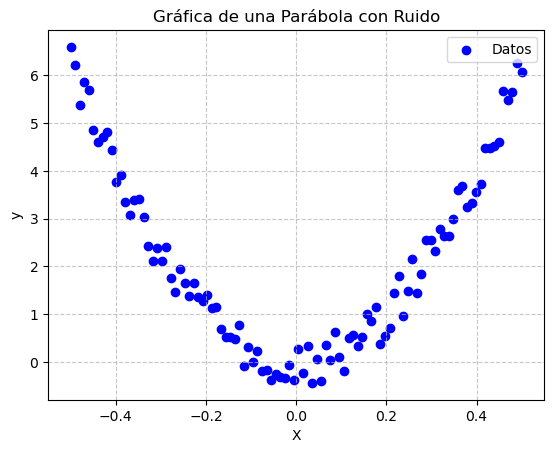

In [178]:
#Crear un set de datos, especificamente una parábola para una mejor visualización 
m = 100
X = np.linspace(-0.5, 0.5, m)
y = 25 * X ** 2 + np.random.rand(m) - 0.5
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los datos
ax.scatter(X, y, color='blue', label='Datos')

# Añadir etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Gráfica de una Parábola con Ruido')

# Añadir cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Añadir leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

In [180]:
#Crear el primer predictor, utiliza árboles de decisiones y regularizalo con un max_depth=2
from sklearn.tree import DecisionTreeRegressor

x = X.reshape(-1, 1)
arbol_1 = DecisionTreeRegressor(max_depth=2)
arbol_1.fit(x, y)

DecisionTreeRegressor(max_depth=2)

In [182]:
#Calcular los errores residuales que 
#son la diferencia entre las predicciones del modelo y el valor de la variable a predecir
y2 = y - arbol_1.predict(x)

In [184]:
#crear el segundo predictor en base a esos residuales.
arbol_2 = DecisionTreeRegressor(max_depth=2)
arbol_2.fit(x, y2)

DecisionTreeRegressor(max_depth=2)

In [186]:
#Visualizar que sucede si sumamos las predicciones del primer predictor con el segundo
y_pred = sum(arbol.predict(x) for arbol in (arbol_1, arbol_2))

In [188]:
#Repetir el mismo procedimiento para crear el árbol 3.
y3 = y - arbol_2.predict(x)
arbol_3 = DecisionTreeRegressor(max_depth=2)
arbol_3.fit(x, y3)

DecisionTreeRegressor(max_depth=2)

In [190]:
#Ahora vamos a ver que sucede si sumamos los 3 árboles
y_pred = sum(arbol.predict(x) for arbol in (arbol_1, arbol_2, arbol_3))

In [192]:
#Crear exactamente el mismo modelo que creamos antes
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=0.5
)
gbrt.fit(x, y)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, n_estimators=3)

In [194]:
#En este caso utilizaremos el error medio cuadrado.
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y)

gbrt = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=120
)
gbrt.fit(X_train, y_train)

errores = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
mejor = np.argmin(errores)
mejor

55

En este caso el mejor caso es en **55** de los 120 árboles que probamos por lo que deberíamos crear nuestro modelo con 56 árboles de decisión.

In [205]:
#Evaluar el early stopping automáticamente con XGBRegressor
from xgboost import XGBRegressor

# Creamo el objeto
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [217]:
# Utilizando early stopping
xgb_early = XGBRegressor(early_stopping_rounds=1, eval_metric='rmse')
xgb_early.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:1.68466
[1]	validation_0-rmse:1.29913
[2]	validation_0-rmse:1.03254
[3]	validation_0-rmse:0.81227
[4]	validation_0-rmse:0.65322
[5]	validation_0-rmse:0.54344
[6]	validation_0-rmse:0.46944
[7]	validation_0-rmse:0.42754
[8]	validation_0-rmse:0.40831
[9]	validation_0-rmse:0.39512
[10]	validation_0-rmse:0.39180
[11]	validation_0-rmse:0.39041
[12]	validation_0-rmse:0.38921


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=1,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## <span style="color:green">6. Stacking </span>

In [221]:
#Importa los regresores necesarios StackingRegressor,LinearRegression, RandomForestRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Generar la regresión lineal
lin_reg = LinearRegression()
#Generar el bosque aleatorio
rfr = RandomForestRegressor()
# Generar el Arbol de
tree_r = DecisionTreeRegressor(max_depth=20)
#Genera los tres modelos 
stacking = StackingRegressor(
    estimators=[
        ("Tree", tree_r),
        ('Linear', lin_reg),
        ("Random Forest", rfr)
    ]
)

stacking.fit(x, y)
#Utiliza Stacking
y_pred = stacking.predict(X_test)